In [12]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import keras
#Instead of using sequential model we use model in which we have to build the network on our own we only get layers from dense.
from keras.layers import Dense, Activation, Input
from keras.models import Model

In [13]:
#Converting MNIST dataset to a pandas dataframe
ds = pd.read_csv('train.csv')
#Only first 10000 examples are being taken due to system limitations since range of pixels is till 255 we divide by 255 to get range between 0 and 1.
data = ds.values[:10000, 1:]/255.0
print data.shape

(10000, 784)


In [3]:
# Define the layers there is one hidden layer of 100 neurons we use sigmoid activation instead of softmax function in the last layer as softmax gives us probabilities that sum to one from all the outputs of neurons but we need each output to be between 0 and 1 sum of all of them can't be 1.Thus we need sigmoid as its output is btw 0 and 1 . Tanh is not a good choice either as its range is btw -1 and 1.        
inp = Input(shape=(784,))
h1 = Dense(100)
a1 = Activation('sigmoid')
y = Dense(784,)
ya = Activation('sigmoid')

# connect layers for autoencoder we need to do this as we have model instead of sequential.
out = ya(y(a1(h1(inp))))

# Create autoencoder model we use mean square error loss function and adam optimizer categoriacal_crossEntropy 
model = Model(inputs=[inp], outputs=[out])
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Build encoder model
encoder = Model(inputs=[inp], outputs=[a1(h1(inp))])
encoder.summary()

# Build decoder model
dec_inp = Input(shape=(100,))
dec_out = ya(y(dec_inp))
decoder = Model(inputs=[dec_inp], outputs=[dec_out])
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               79184     
_________________________________________________________________
activation_2 (Activation)    (None, 784)               0         
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inpu

In [4]:
hist = model.fit(data[:4500], data[:4500],
                epochs=50,
                shuffle=True,
                batch_size=100,
                validation_data=(data[4500:], data[4500:]))

Train on 4500 samples, validate on 500 samples
Epoch 1/50
4500/4500 [==============================] - 0s - loss: 0.1138 - acc: 0.0089 - val_loss: 0.0691 - val_acc: 0.0160
Epoch 2/50
4500/4500 [==============================] - 0s - loss: 0.0692 - acc: 0.0093 - val_loss: 0.0676 - val_acc: 0.0100
Epoch 3/50
4500/4500 [==============================] - 0s - loss: 0.0681 - acc: 0.0100 - val_loss: 0.0665 - val_acc: 0.0140
Epoch 4/50
4500/4500 [==============================] - 0s - loss: 0.0665 - acc: 0.0144 - val_loss: 0.0644 - val_acc: 0.0120
Epoch 5/50
4500/4500 [==============================] - 0s - loss: 0.0639 - acc: 0.0160 - val_loss: 0.0616 - val_acc: 0.0080
Epoch 6/50
4500/4500 [==============================] - 0s - loss: 0.0606 - acc: 0.0180 - val_loss: 0.0583 - val_acc: 0.0080
Epoch 7/50
4500/4500 [==============================] - 0s - loss: 0.0572 - acc: 0.0198 - val_loss: 0.0551 - val_acc: 0.0160
Epoch 8/50
4500/4500 [==============================] - 0s - loss: 0.0540 - ac

In [5]:
ex = encoder.predict(data[:100])
print ex.shape

(100, 100)


In [6]:
dx = decoder.predict(ex)
print dx.shape

(100, 784)


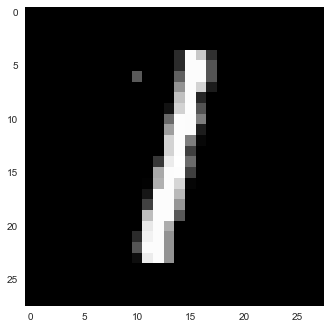

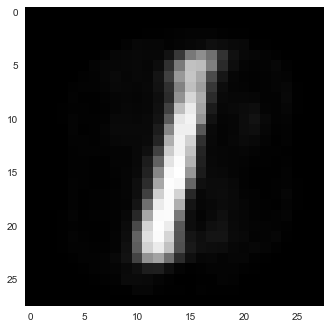

In [7]:
#We are now going to predict how the image looks after recreation(figure 1) varsus the original one(figure 0)
n = np.random.choice(range(100))
plt.figure(0)
plt.grid('off')
plt.imshow(data[n].reshape((28, 28)), cmap='gray')

plt.figure(1)
plt.grid('off')
plt.imshow(dx[n].reshape((28, 28)), cmap='gray')

In [14]:
# Define the layers there is 3 hidden layer of 100 neurons we use sigmoid activation instead of softmax function in the last layer as softmax gives us probabilities that sum to one from all the outputs of neurons but we need each output to be between 0 and 1 sum of all of them can't be 1.Thus we need sigmoid as its output is btw 0 and 1 . Tanh is not a good choice either as its range is btw -1 and 1.        
#Using multiple layers help in smooth transition making output better we can add more layers but that would come at the cost of computation cost
inp = Input(shape=(784,))
h1 = Dense(250)
a1 = Activation('sigmoid')
h2 = Dense(100)
a2 = Activation('sigmoid')
h3 = Dense(250)
a3 = Activation('sigmoid')
y = Dense(784,)
ya = Activation('sigmoid')

# connect layers for autoencoder we need to do this as we have model instead of sequential.
out = ya(y(a3(h3(a2(h2(a1(h1(inp))))))))

# Create autoencoder model we use mean square error loss function and adam optimizer categoriacal_crossEntropy 
model = Model(inputs=[inp], outputs=[out])
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Build encoder model
encoder = Model(inputs=[inp], outputs=[a2(h2(a1(h1(inp))))])
encoder.summary()

# Build decoder model
dec_inp = Input(shape=(100,))
dec_out = ya(y(a3(h3(dec_inp))))
decoder = Model(inputs=[dec_inp], outputs=[dec_out])
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               196250    
_________________________________________________________________
activation_3 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25100     
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               25250     
_________________________________________________________________
activation_5 (Activation)    (None, 250)               0         
__________

In [15]:
hist = model.fit(data[:7500], data[:7500],
                epochs=50,
                shuffle=True,
                batch_size=100,
                validation_data=(data[7500:], data[7500:]))

Train on 7500 samples, validate on 2500 samples
Epoch 1/50
7500/7500 [==============================] - 1s - loss: 0.0824 - acc: 0.0089 - val_loss: 0.0680 - val_acc: 0.0092
Epoch 2/50
7500/7500 [==============================] - 1s - loss: 0.0673 - acc: 0.0104 - val_loss: 0.0664 - val_acc: 0.0072
Epoch 3/50
7500/7500 [==============================] - 1s - loss: 0.0639 - acc: 0.0099 - val_loss: 0.0623 - val_acc: 0.0164
Epoch 4/50
7500/7500 [==============================] - 1s - loss: 0.0611 - acc: 0.0141 - val_loss: 0.0597 - val_acc: 0.0056
Epoch 5/50
7500/7500 [==============================] - 1s - loss: 0.0560 - acc: 0.0116 - val_loss: 0.0531 - val_acc: 0.0096
Epoch 6/50
7500/7500 [==============================] - 1s - loss: 0.0520 - acc: 0.0121 - val_loss: 0.0509 - val_acc: 0.0060
Epoch 7/50
7500/7500 [==============================] - 1s - loss: 0.0490 - acc: 0.0101 - val_loss: 0.0467 - val_acc: 0.0096
Epoch 8/50
7500/7500 [==============================] - 2s - loss: 0.0450 - a

In [16]:
ex = encoder.predict(data[:100])
print ex.shape

(100, 100)


In [17]:
dx = decoder.predict(ex)
print dx.shape

(100, 784)


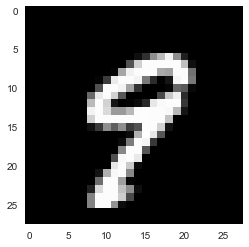

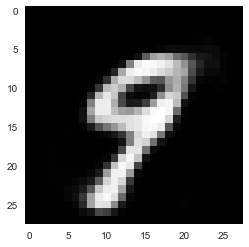

In [18]:
n = np.random.choice(range(100))
plt.figure(0)
plt.grid('off')
plt.imshow(data[n].reshape((28, 28)), cmap='gray')

plt.figure(1)
plt.grid('off')
plt.imshow(dx[n].reshape((28, 28)), cmap='gray')